<a href="https://colab.research.google.com/github/sausis20/Youtube-Trending-Scraper-and-EDA/blob/main/data_cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baltic countries' Youtube trending videos EDA  
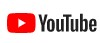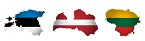

## Import and clean the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import datetime as dt
from collections import Counter
import wordcloud
import kaleido

color_map={'LT': 'rgb(4, 106, 56)', 'LV': 'rgb(164,52,58)', 'EE': 'rgb(0,114,206)'}

In [ ]:
cd '/content/gdrive/My Drive/Colab Notebooks/YouTube Trending Scraper/'

/content/gdrive/My Drive/Colab Notebooks/YouTube Trending Scraper


In [ ]:
df = pd.read_csv("Baltics_combined.csv")
df.head()

,title,publishedAt,channelTitle,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Video Category,Country
0,Vaidas Baumila - Apžavai,2022-07-20T05:00:12Z,Vaidas Baumila,22.22.07,121809,0,0,118,False,True,Music,LT
1,Nepatogūs klausimai. Svečiuose – Iglė Bernotai...,2022-07-17T16:00:19Z,Delfi,22.22.07,126097,0,0,129,False,True,News & Politics,LT
2,QUARTER-FINALS: France v Lithuania | Full Bask...,2022-07-21T18:48:21Z,FIBA - The Basketball Channel,22.22.07,124261,0,0,14,False,True,Sports,LT
3,Monique - Palauksiu kol užmigsi (Vertical Musi...,2022-07-15T06:00:11Z,Monique,22.22.07,125700,0,0,95,False,True,Music,LT
4,День сто сорок восьмой. Беседа с @Alexey Arest...,2022-07-21T19:44:50Z,ФЕЙГИН LIVE,22.22.07,1436550,0,0,2943,False,True,News & Politics,LT


Looking at the first five rows, it seems that all rows in 'likes' and 'dislikes' columns have 0 values. Lets check if we have data for these columns, or if it is missing

In [ ]:
df[['likes', 'dislikes']].nunique()

likes       1
dislikes    1
dtype: int64

As suspected, these columns have only 1 unique value (zero).This means we don't have data for these columns, thus we can remove them from further analysis

In [ ]:
df = df.drop(['likes', 'dislikes'], axis=1)

In [ ]:
df.shape

(11400, 10)

We also check for NaN values and also drop them from the dataset

In [ ]:
df[df.isna().any(axis=1)].head()

,title,publishedAt,channelTitle,trending_date,view_count,comment_count,comments_disabled,ratings_disabled,Video Category,Country
616,Миллиарды за молчание. Куда пропала Людмила Пу...,2022-08-04T12:12:28Z,Алексей Навальный,22.05.08,1990909,13341,False,True,NaN,LT
656,Миллиарды за молчание. Куда пропала Людмила Пу...,2022-08-04T12:12:28Z,Алексей Навальный,22.09.08,4852300,25088,False,True,NaN,LT
709,Миллиарды за молчание. Куда пропала Людмила Пу...,2022-08-04T12:12:28Z,Алексей Навальный,22.10.08,5233075,26604,False,True,NaN,LT
761,Миллиарды за молчание. Куда пропала Людмила Пу...,2022-08-04T12:12:28Z,Алексей Навальный,22.11.08,5509235,27590,False,True,NaN,LT
813,Миллиарды за молчание. Куда пропала Людмила Пу...,2022-08-04T12:12:28Z,Алексей Навальный,22.12.08,5755353,28316,False,True,NaN,LT


In [ ]:
df = df.dropna()
df.shape

(11310, 10)

In [ ]:
df.dtypes

title                object
publishedAt          object
channelTitle         object
trending_date        object
view_count            int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
Video Category       object
Country              object
dtype: object

We see that values in 'publishedAt' and 'trending_date' columns are of type object, so we change them to type datetime

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], infer_datetime_format=True)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [ ]:
df[['publishedAt', 'trending_date']].dtypes

publishedAt      datetime64[ns]
trending_date    datetime64[ns]
dtype: object

We add two more columns:


*   days_published - which shows days between publishing and trending dates
*   days_duration - which shows how many days the video was trending



In [ ]:
df['days_published'] = (df['trending_date'] - pd.to_datetime(df['publishedAt'].dt.strftime('%m-%d-%Y'))).astype(str).str[-7:-5]
df['days_published'] = df['days_published'].astype(int)

In [ ]:
df['days_duration'] = df.groupby('title')['title'].transform('count')
df.head()

,title,publishedAt,channelTitle,trending_date,view_count,comment_count,comments_disabled,ratings_disabled,Video Category,Country,days_published,days_duration
0,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-07-22,121809,118,False,True,Music,LT,2,20
1,Nepatogūs klausimai. Svečiuose – Iglė Bernotai...,2022-07-17 16:00:19,Delfi,2022-07-22,126097,129,False,True,News & Politics,LT,5,12
2,QUARTER-FINALS: France v Lithuania | Full Bask...,2022-07-21 18:48:21,FIBA - The Basketball Channel,2022-07-22,124261,14,False,True,Sports,LT,1,6
3,Monique - Palauksiu kol užmigsi (Vertical Musi...,2022-07-15 06:00:11,Monique,2022-07-22,125700,95,False,True,Music,LT,7,17
4,День сто сорок восьмой. Беседа с @Alexey Arest...,2022-07-21 19:44:50,ФЕЙГИН LIVE,2022-07-22,1436550,2943,False,True,News & Politics,LT,1,16


In [ ]:
print(df['trending_date'].min(), df['trending_date'].max())
print(df['trending_date'].nunique(), " unique values")

2022-07-22 00:00:00 2022-11-03 00:00:00
76  unique values


In [ ]:
df[df['title'] == 'Vaidas Baumila - Apžavai'].tail()

,title,publishedAt,channelTitle,trending_date,view_count,comment_count,comments_disabled,ratings_disabled,Video Category,Country,days_published,days_duration
760,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-11,580099,243,False,True,Music,LT,22,20
810,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-12,596686,244,False,True,Music,LT,23,20
874,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-16,677479,260,False,True,Music,LT,27,20
931,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-17,698033,263,False,True,Music,LT,28,20
988,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-19,720658,265,False,True,Music,LT,30,20


We see that the dataset contains trending video data for 76 days - from 2022-07-22 until 2022-11-03. We also see that some videos appear multiple times in the dataset, which means that these videos were trending for multiple days. For further analysis, we will retain only the last occurence when each video was trending (to get the maximum values of view count, comment count, trending duration, etc.). 

In [ ]:
df = df.sort_values('trending_date', ascending=False).drop_duplicates('title').sort_index()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df[df['title'] == 'Vaidas Baumila - Apžavai']

,title,publishedAt,channelTitle,trending_date,view_count,comment_count,comments_disabled,ratings_disabled,Video Category,Country,days_published,days_duration
119,Vaidas Baumila - Apžavai,2022-07-20 05:00:12,Vaidas Baumila,2022-08-19,720658,265,False,True,Music,LT,30,20


In [ ]:
df.shape

(1861, 12)

After removing duplicate titles, there is now 1,861 unique video titles (down from 11,310 in the original dataset)

## Exploratory data analysis

In [ ]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,view_count,comment_count,days_published,days_duration
count,1861.00,1861.00,1861.00,1861.00
mean,3966203.86,12183.90,5.82,6.08
std,12757918.91,94156.75,4.66,6.15
min,18658.00,0.00,0.00,1.00
25%,559870.00,1103.00,2.00,2.00
50%,1392327.00,3312.00,5.00,4.00
75%,2766363.00,7644.00,8.00,8.00
max,258849494.00,3476973.00,35.00,45.00


We note from the table that:


*   The average number of views of a trending video is 3,966,203. The median value for the number of views is 1,392,327, which means that half of the trending videos have less views than this number, and the other half have more views than this number
*   The average comment count is 12,183 while the median is 3,312
*   Standard deviation for view count is 12,757,918. This is higher than the mean, and therefore suggests that the data has a lot of variation



### Views barchart

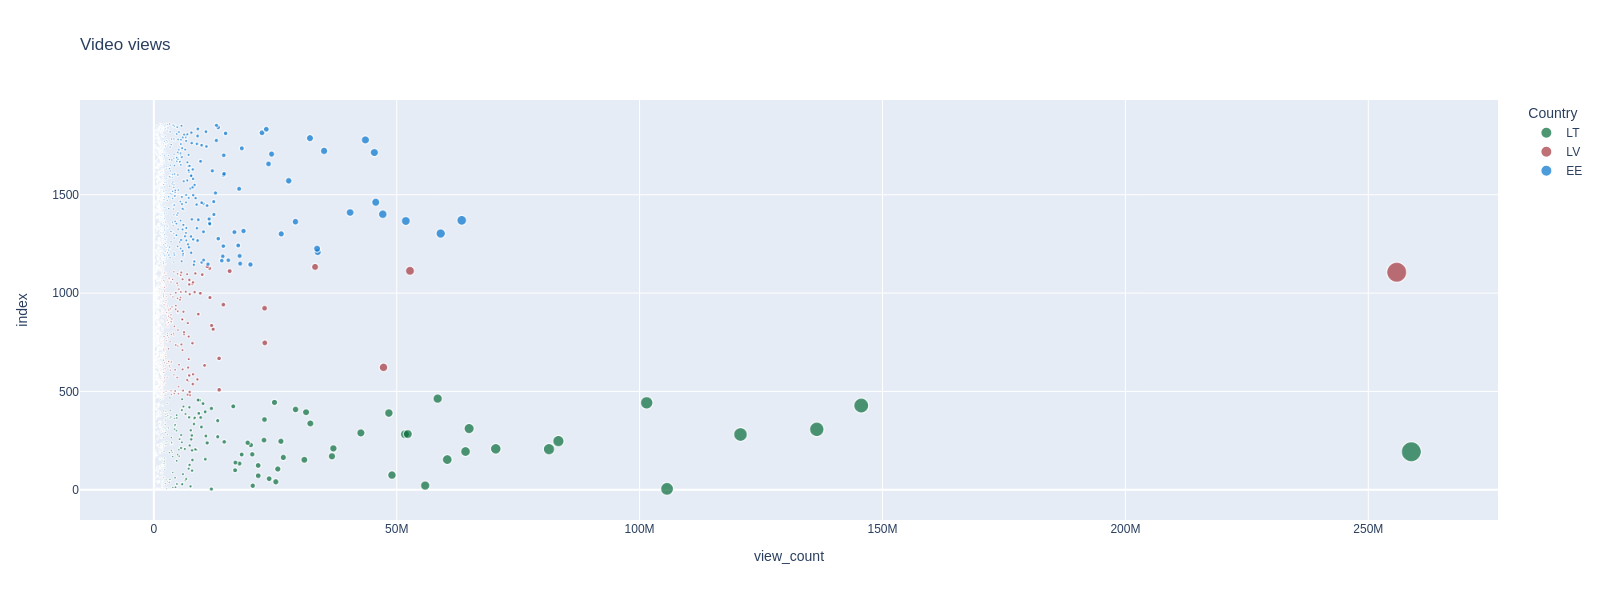

In [ ]:
fig = px.scatter(df, 'view_count', size='view_count', color='Country', color_discrete_map=color_map, title='Video views')
fig.update_layout(width=1600, height=600)
fig.show('png')

We see that the majority of the videos have less than 50 million views. We also see that there are a few videos with over 100M views.

In [ ]:
df[df['view_count'] < 1000000]['view_count'].count() / df['view_count'].count() * 100

39.70983342289092

In [ ]:
df[df['view_count'] < 2000000]['view_count'].count() / df['view_count'].count() * 100

65.82482536270821

Similarly, we see that around 40% of the videos have less than 1M views, and 66% have less than 2M views.

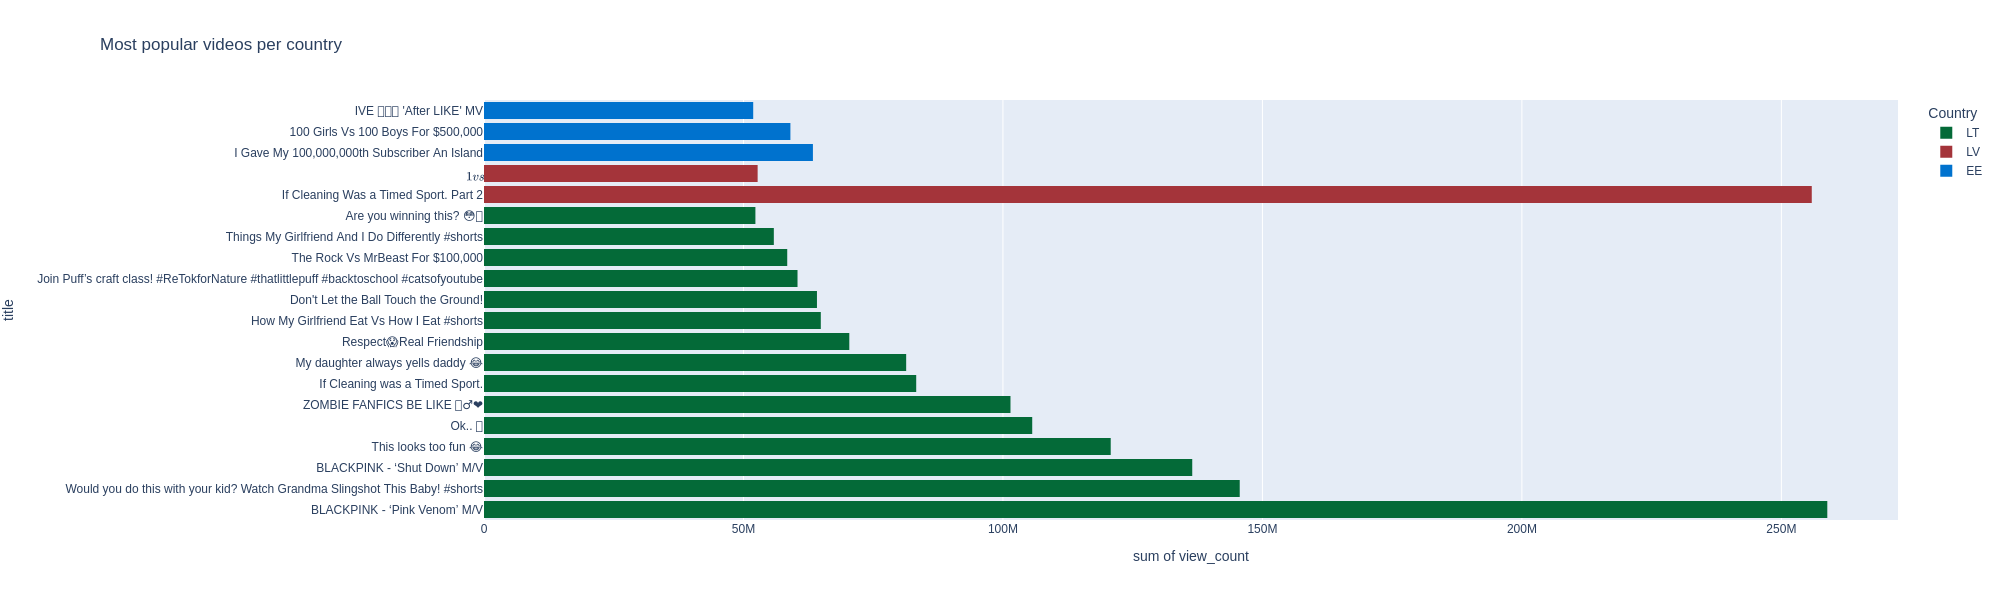

In [ ]:
df_temp = df.sort_values(by=['view_count'], ascending = False).head(20)
fig = px.histogram(df_temp, x='view_count', y = 'title', 
                   color='Country', 
                   color_discrete_map=color_map, 
                   title='Most popular videos per country')
fig.update_layout(width=2000, height=600)
fig.show('png')

### Comments barchart

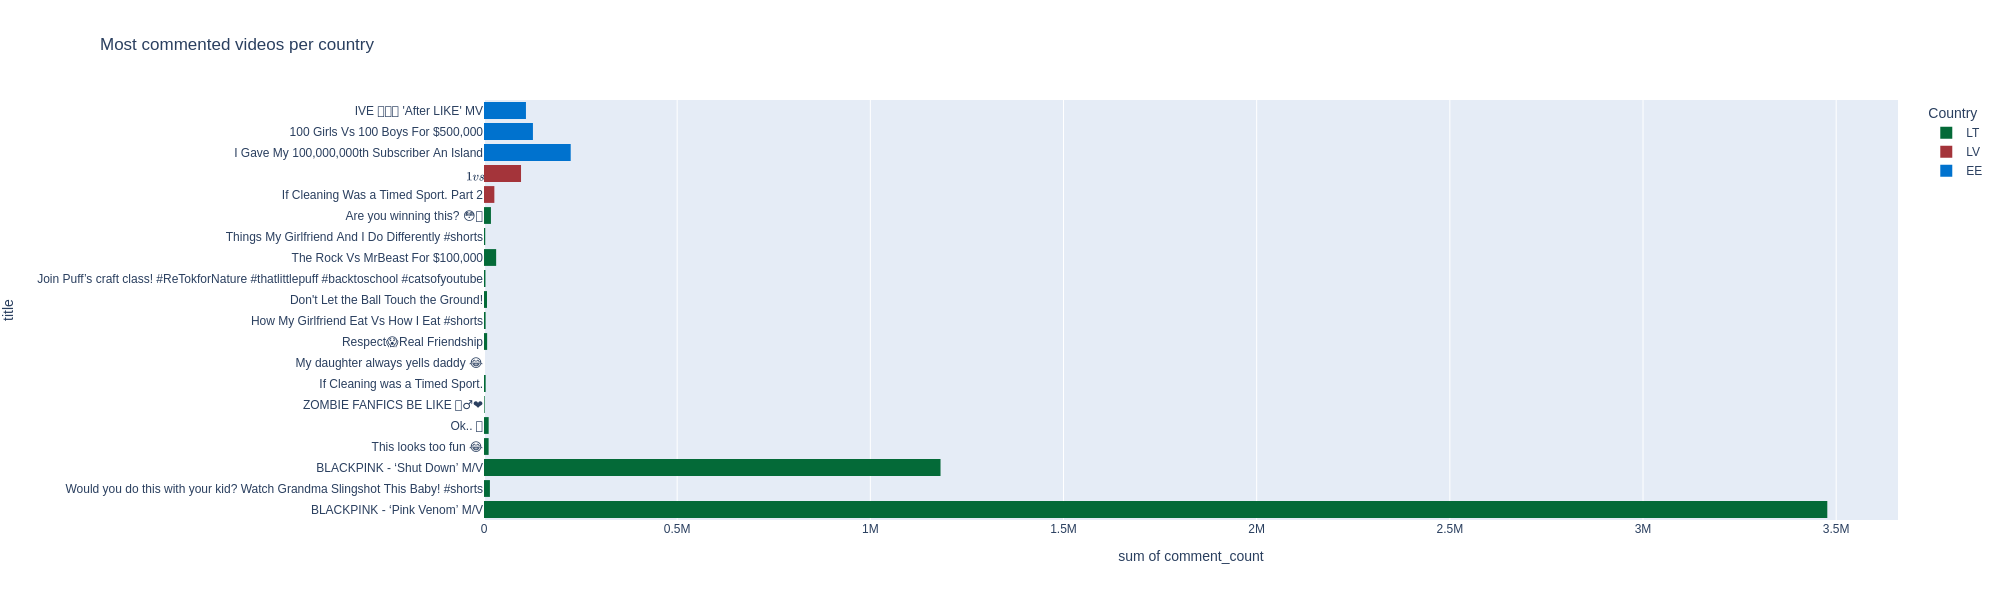

In [ ]:
df_temp = df.sort_values(by=['view_count'], ascending = False).head(20)
fig = px.histogram(df_temp, x='comment_count', y = 'title', 
                   color='Country', 
                   color_discrete_map=color_map, 
                   title='Most commented videos per country')
fig.update_layout(width=2000, height=600)
fig.show('png')

In [ ]:
df['comment_count'].mean() / df['view_count'].mean() * 100

0.3071928770569127

We can see that a video is commented 0.3% of the time i.e. around every 307 views.

### Trending duration

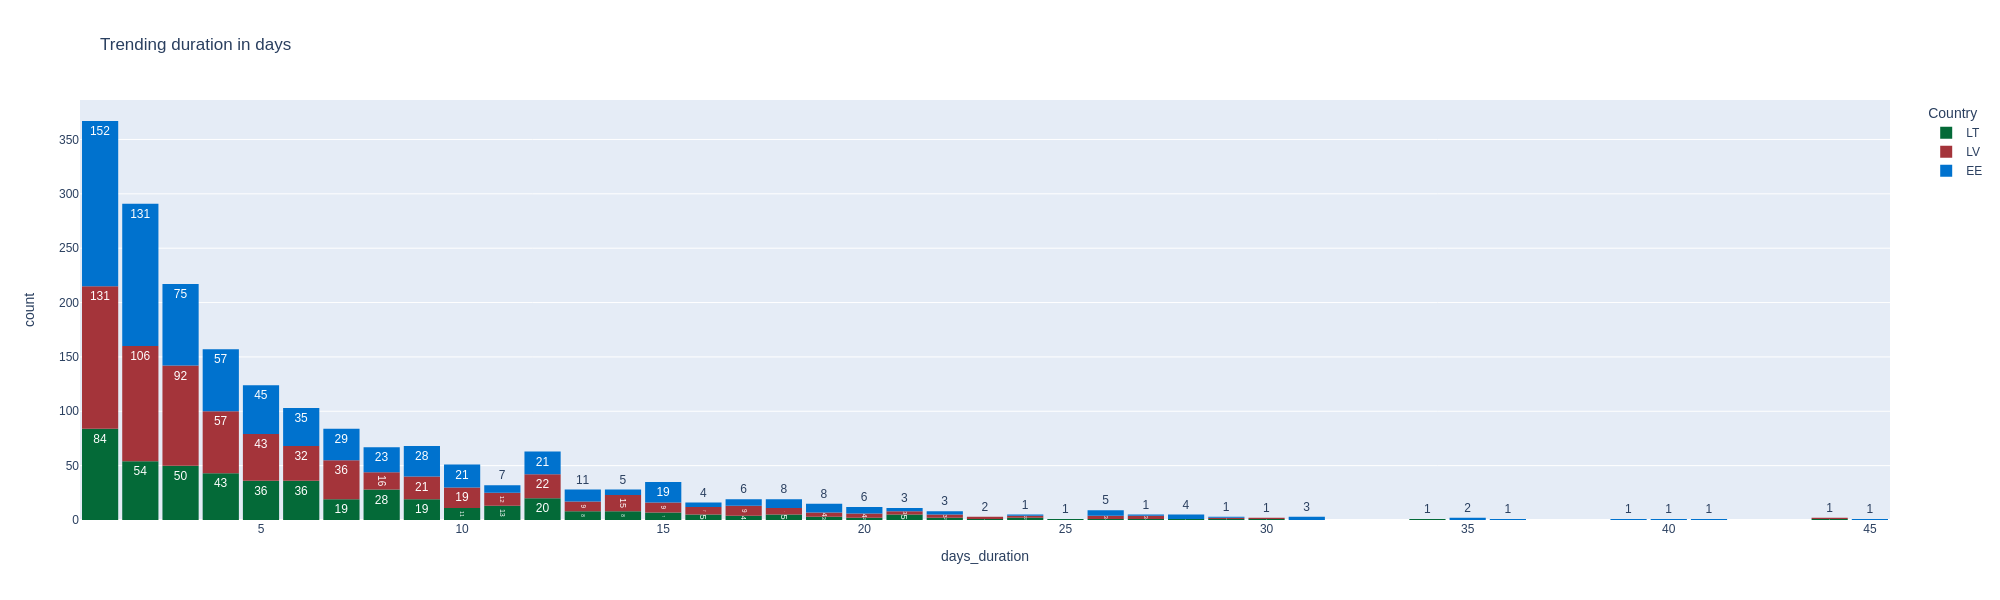

In [ ]:
fig = px.histogram(df, x='days_duration', 
                   title='Trending duration in days', 
                   color='Country', 
                   color_discrete_map=color_map, 
                   text_auto=True)
fig.update_layout(width=2000, height=600, bargap=0.1)
fig.show('png')

Trending duration shows that usually videos trend for only a few days, with most videos trending for only one day.

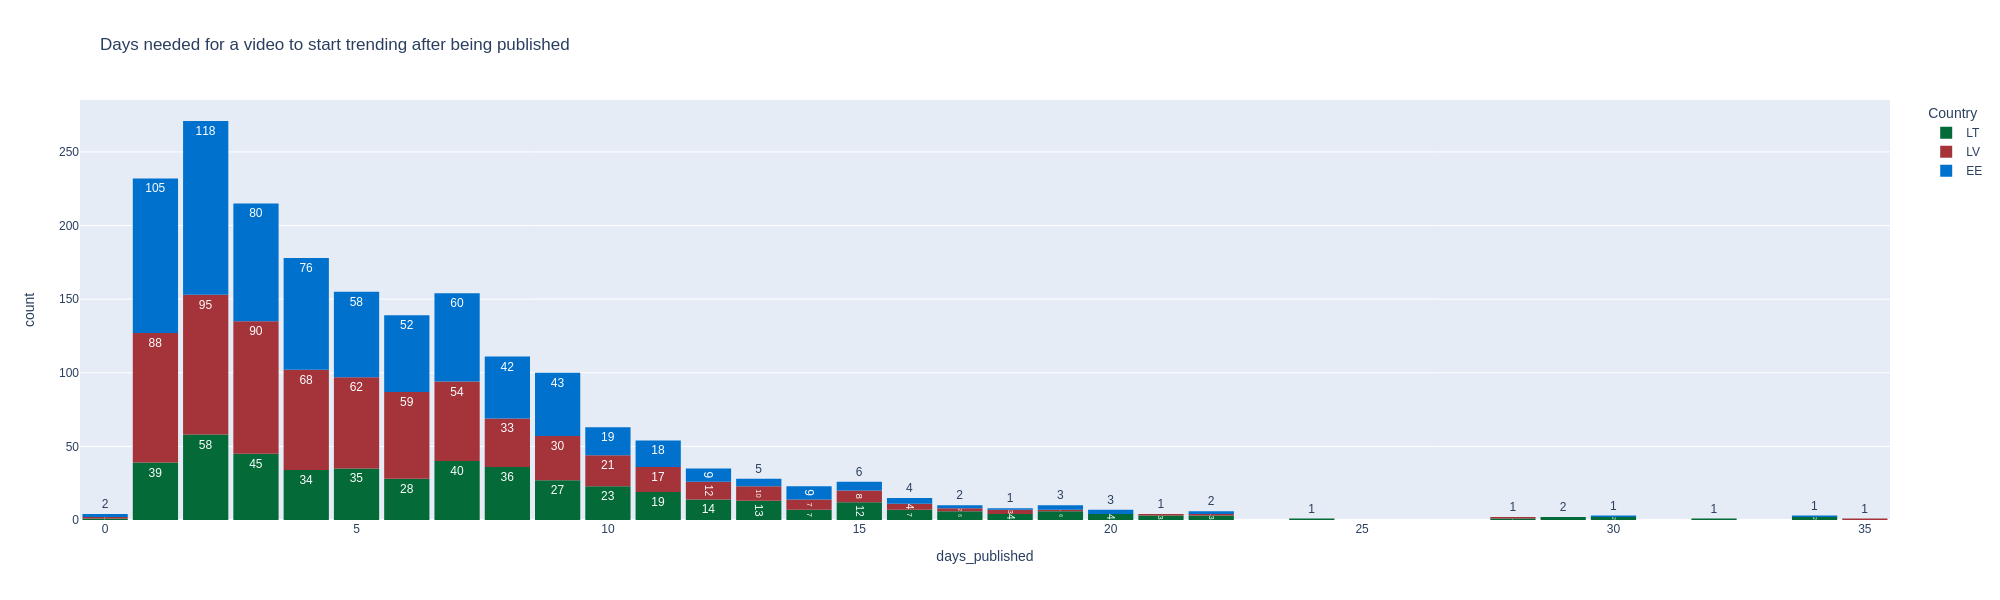

In [ ]:
fig = px.histogram(df, x='days_published', 
                   title='Days needed for a video to start trending after being published', 
                   color='Country', 
                   color_discrete_map=color_map, 
                   text_auto=True)
fig.update_layout(width=2000, height=600, bargap=0.1)
fig.show('png')

This graph shows that the videos usually start trending immediately after being published. We also see that videos that didn't become popular in the first 15 days after being published, have an increasingly low chance of becoming popular after this mark

### Video title lenghts

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

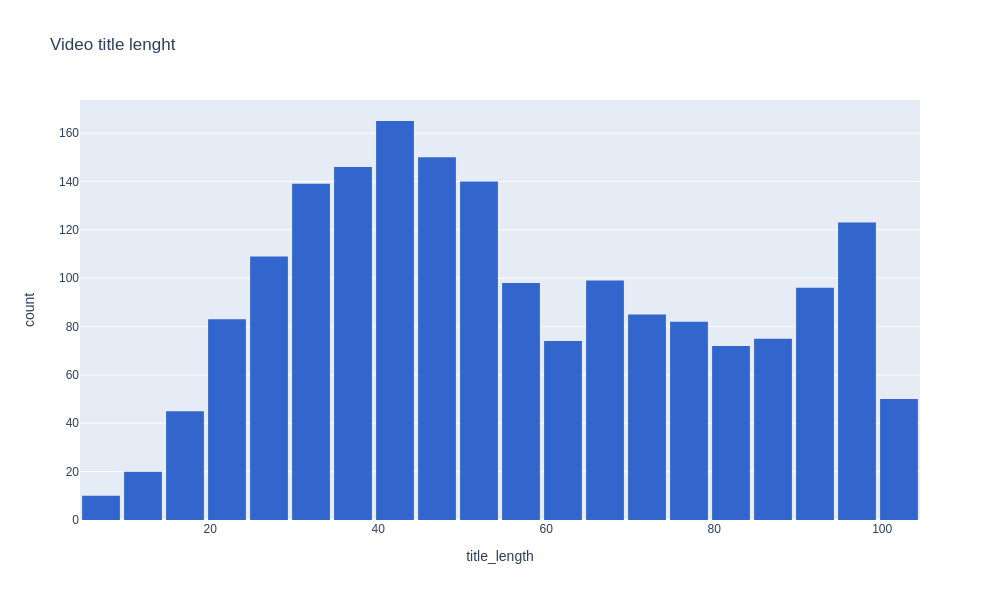

In [ ]:
fig = px.histogram(df, x='title_length', title='Video title lenght', color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(autosize=False, width=1000, height=600, bargap=0.1)
fig.show('png')

From this graph we can see that video titles have a varying lenght, although usually it is between 20 and 100 charachters long.

### Videos that contain capitalized words

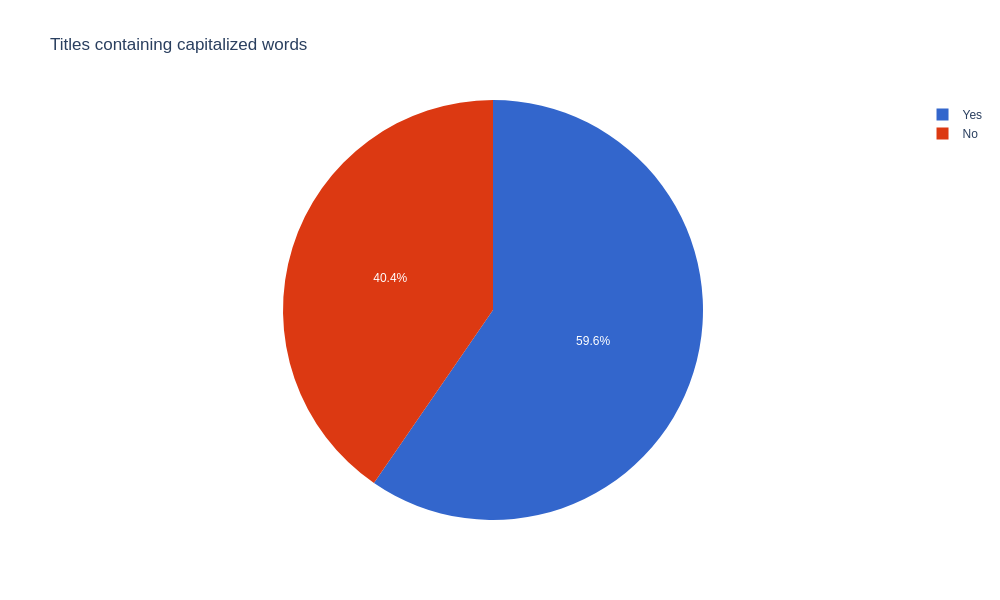

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df['contains_capitalized'] = df['title'].apply(contains_capitalized_word)
value_counts = df['contains_capitalized'].value_counts().to_dict()

fig = px.pie(df, values=value_counts, 
             title='Titles containing capitalized words', 
             names=['Yes', 'No'], 
             color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=1000, height=600)
fig.show('png')

In [ ]:
df['contains_capitalized'].value_counts(normalize=True)

True    0.60
False   0.40
Name: contains_capitalized, dtype: float64

Surpisingly, it seems that around 60% of trending videos have a capitalized word in their title.

### Most common words in video titles

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [word for title in title_words for word in title]
Counter(title_words).most_common(25)

[('|', 397),
 ('в', 260),
 ('-', 250),
 ('и', 149),
 ('с', 132),
 ('на', 120),
 ('/', 105),
 ('The', 78),
 ('2022', 75),
 ('VS', 74),
 ('I', 73),
 ('День', 70),
 ('В', 65),
 ('Беседа', 64),
 ('@Alexey', 62),
 ('Arestovych', 62),
 ('Арестович', 61),
 ('Алексей', 60),
 ('the', 51),
 ('–', 44),
 ('to', 44),
 ('—', 44),
 ('24', 41),
 ('не', 41),
 ('//', 41)]

In [ ]:
things_to_remove = ['|', 'в', '-', 'и', 'с', 'на', '/', 'The', 'VS', 'I', 'День', 'В', 'the', '–', 'to', '—', 'не', '//', 'Беседа', 'что', 'от', 'за', 'vs', 'из']

for s in things_to_remove:
  while s in title_words: title_words.remove(s)

Ignoring various symbols and article words, like '|' and 'the', we can see that names 'Alexey' and 'Arestovych' occured the most amount of times. 
We can draw a word cloud for the titles of the trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

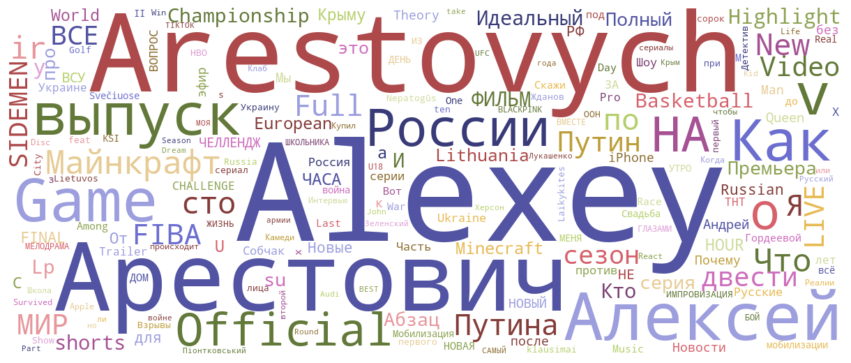

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

### Channels with the highest amount of trending videos

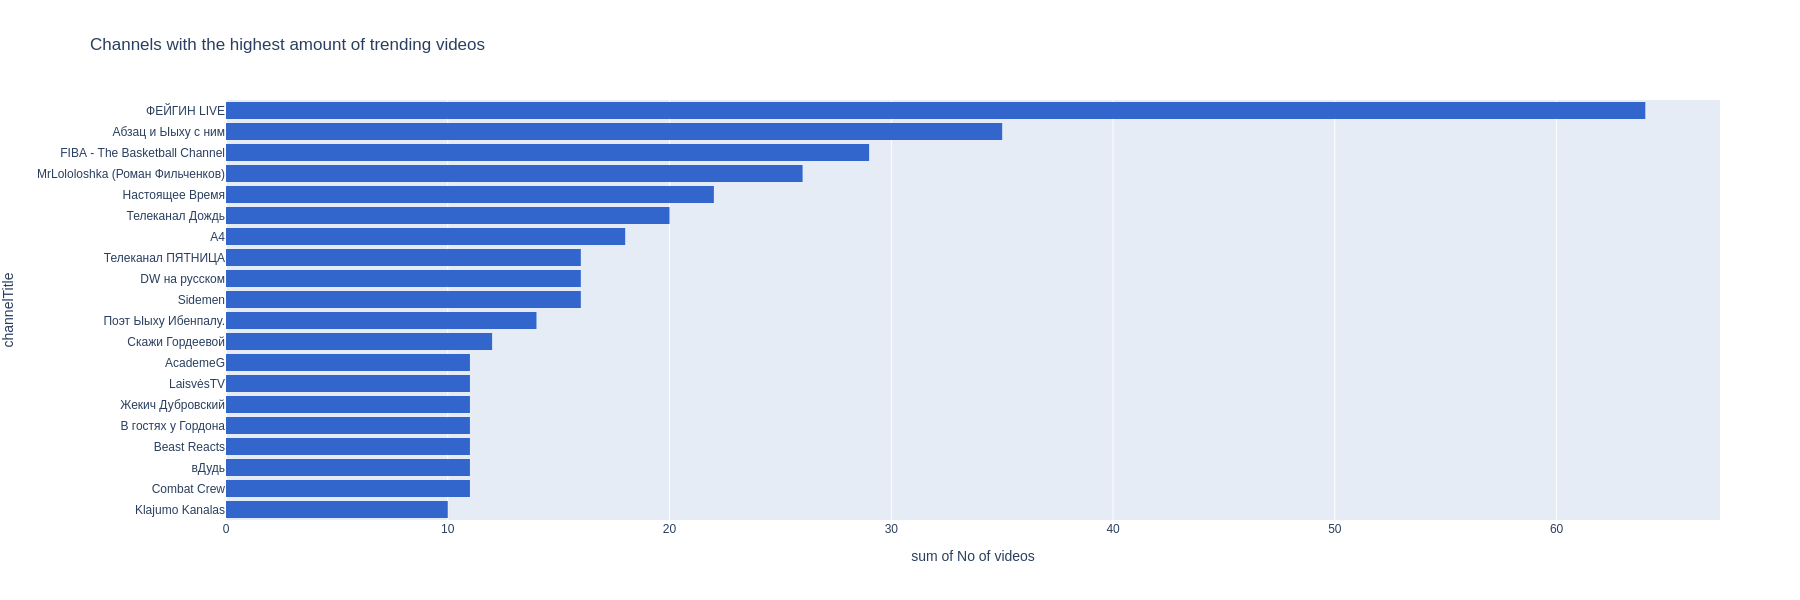

In [ ]:
df_temp = df.groupby("channelTitle").size().reset_index(name='No of videos').sort_values("No of videos", ascending=False).head(20)
df_temp = df_temp.sort_values(by=['No of videos'], ascending = True)

fig = px.histogram(df_temp, x='No of videos', y = 'channelTitle',
                   color_discrete_sequence=px.colors.qualitative.G10, 
                   title='Channels with the highest amount of trending videos')
fig.update_layout(width=1800, height=600)
fig.show('png')

We see that a lot of channels are in russian, however there are also a few familiar Lithuanian channels, like LaisvėsTV and Klajumo Kanalas. 

### Categories with the largest number of trending videos

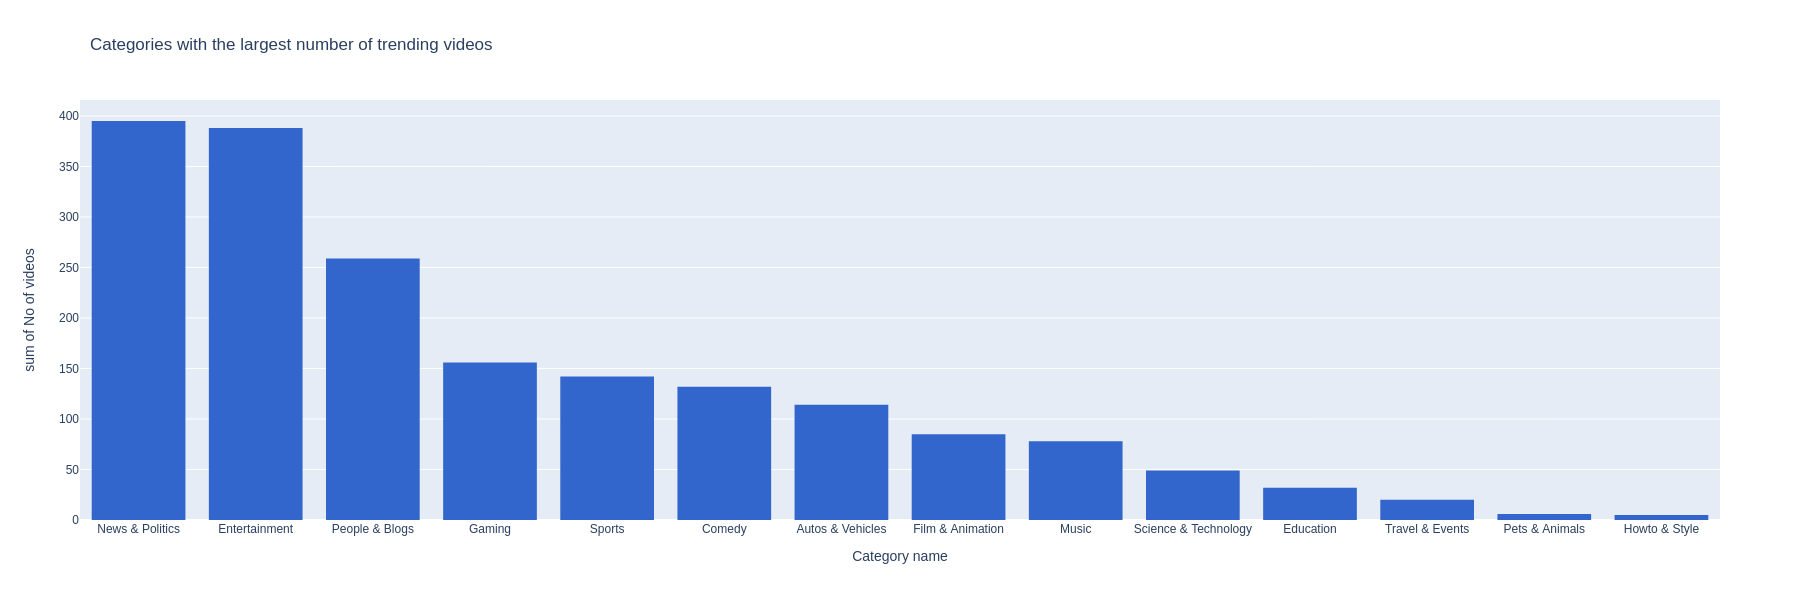

In [ ]:
df_temp = df["Video Category"].value_counts().to_frame().reset_index()
df_temp.rename(columns={"index": "Category name", "Video Category": "No of videos"}, inplace=True)

fig = px.histogram(df_temp, x='Category name', y = 'No of videos',
                   color_discrete_sequence=px.colors.qualitative.G10, 
                   title='Categories with the largest number of trending videos')
fig.update_layout(width=1800, height=600)
fig.show('png')

We can see that News & Politics and Entertainment categories have the largest number of trending videos - around 400 each, followed by People & Blogs with 250 videos, and so on.

### Trending videos and their publishing time

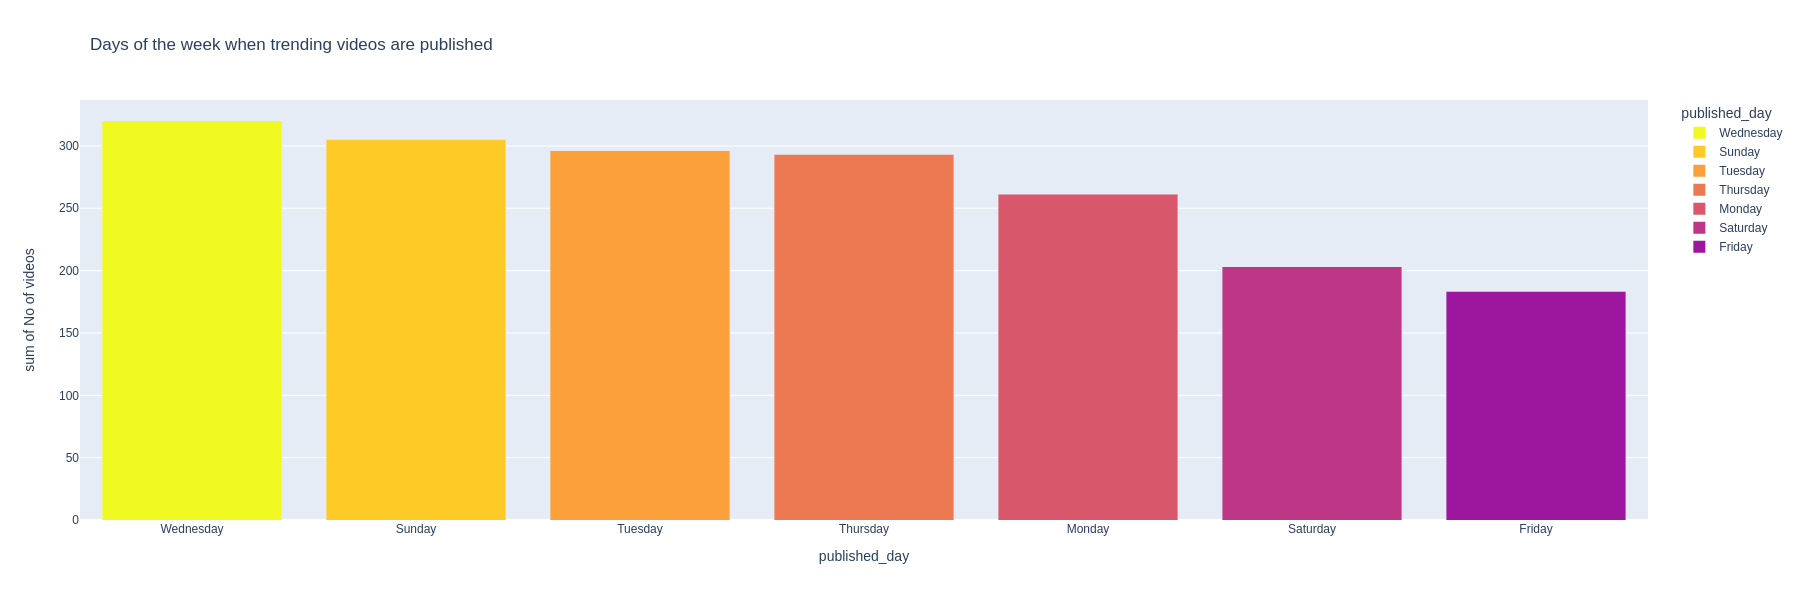

In [ ]:
df['published_day'] = df['publishedAt'].dt.day_name()
df_temp = df['published_day'].value_counts().to_frame().reset_index().rename(columns={"index": "published_day", "published_day": "No of videos"})
fig = px.histogram(df_temp, x='published_day', y = 'No of videos', color='published_day',
                   color_discrete_sequence=px.colors.sequential.Plasma_r, 
                   title='Days of the week when trending videos are published')
fig.update_layout(width=1800, height=600)
fig.show('png')

We see that the most popular day to publish videos is Wednesday, while the least popular days are Saturday and Friday, which have significantly less videos published.

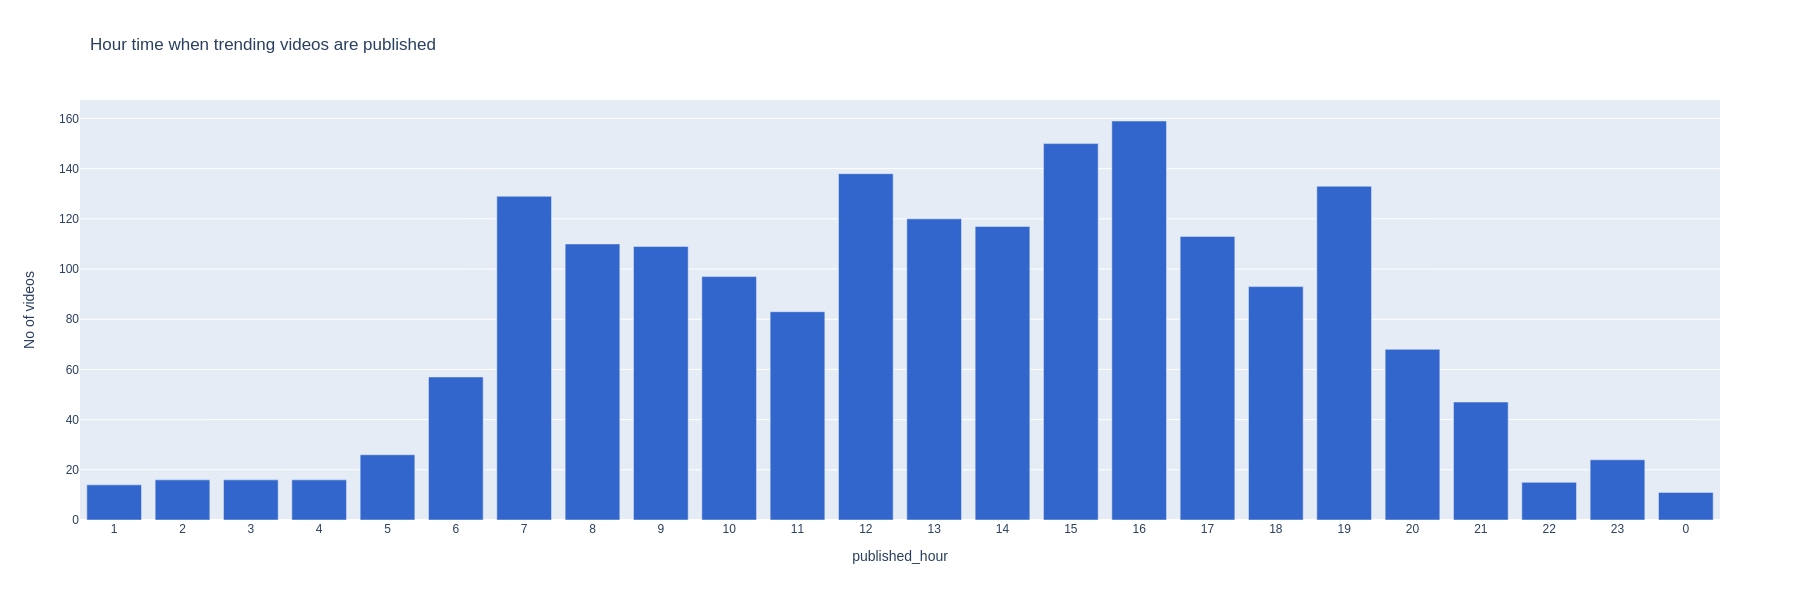

In [ ]:
df['published_hour'] = pd.DatetimeIndex(df['publishedAt']).hour.astype(str)
df_temp = df['published_hour'].value_counts().to_frame().reset_index().rename(columns={"index": "published_hour", "published_hour": "No of videos"})
fig = px.bar(df_temp, x='published_hour', y='No of videos',
                   color_discrete_sequence=px.colors.qualitative.G10, 
                   title='Hour time when trending videos are published')
fig.update_layout(width=1800, height=600)
fig.update_xaxes(categoryorder='array', categoryarray= [x for x in range(1,24)])
fig.show('png')

We see that videos are usually published during day time, from 6:00 to 21:00, with the largest number of videos published in the afternoon at around 16:00. Likewise, there are relatively small number of videos published between 22:00 and 5:00

### Trending videos that have their comments disabled

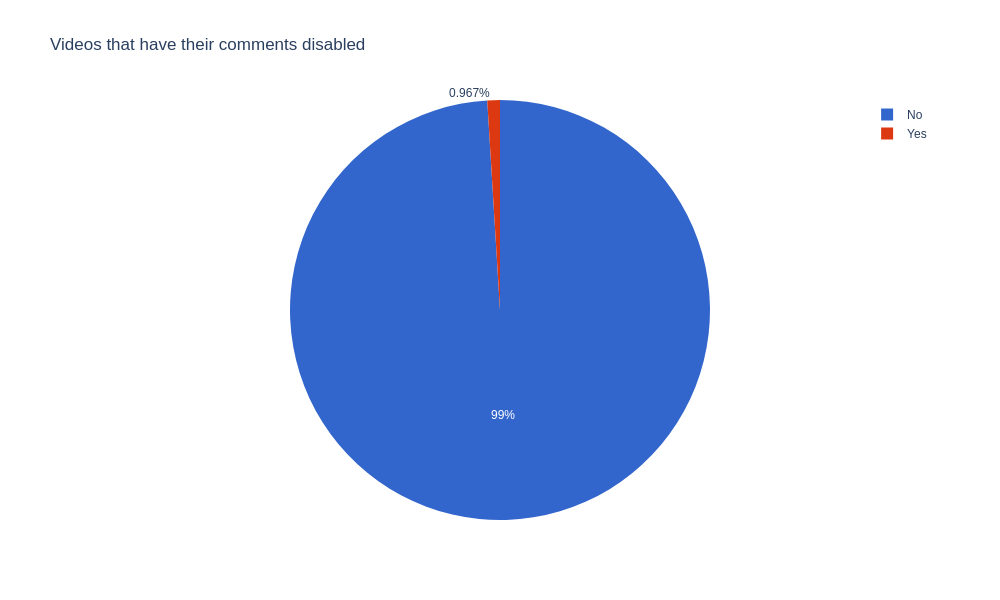

In [ ]:
df_temp = df['comments_disabled'].value_counts().to_frame().reset_index().rename(columns={"index": "status", "comments_disabled": "No of videos"})
fig = px.pie(df_temp, values='No of videos', 
                   color_discrete_sequence=px.colors.qualitative.G10, 
                   title='Videos that have their comments disabled', 
                   names=['No', 'Yes'])
fig.update_layout(width=1000, height=600)
fig.show('png')

## Conclusions

This notebook analyzes Youtube's trending video data for Baltic countries (LT, LV, EE), collected during 2022-07-22 - 2022-11-03. It contains information for 76 days and 11310 video entries in total. Here are the main results:
* 40% of trending videos have less than 1 million views, and 66% have less than 2 million views
* Some videos were trending for mulpitle days and therefore appeared in the dataset more than once. From the total of 11310 entries, 1861 are unique videos.
* On average, videos are commented 0.3% of the time i.e. around every 307 views
* Most of the videos trend for less than 5 days and similarly, they usually become trending after <= 5 days after being published. This suggests that Youtube's top trending list is fast-changing and newly published videos are more popular than older videos
* Trending video titles vary a lot in lenght - although usually their lenght is between 20 and 100 charachter long
* Various articles and symbols from the Cyrillic script like | , в, -, и, were common in trending video titles. Excluding these symbols, the words 'Alexey', 'Arestovych' and 'Game' were the most common words in the trending video titles
* The category that has the largest number of trending videos is 'News & Politics' with 395 videos, followed by 'Entertainment' with 388 videos.